In [170]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [171]:
PROJECT_ROOT = os.path.abspath("..")
PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")
X_train_path = os.path.join(PROCESSED_PATH, "X_train.npy")
y_train_path = os.path.join(PROCESSED_PATH, "y_train.npy")
X_val_path = os.path.join(PROCESSED_PATH, "X_val.npy")
y_val_path = os.path.join(PROCESSED_PATH, "y_val.npy")
X_test_path = os.path.join(PROCESSED_PATH, "X_test.npy")
y_test_path = os.path.join(PROCESSED_PATH, "y_test.npy")

In [172]:
X_train = np.load(X_train_path)
y_train = np.load(y_train_path)
X_val = np.load(X_val_path)
y_val = np.load(y_val_path)
X_test = np.load(X_test_path)
y_test = np.load(y_test_path)

In [173]:
X_full = np.concatenate([X_train, X_val, X_test], axis=0)
y_full = np.concatenate([y_train, y_val, y_test], axis=0)

In [174]:
X_train_new, X_temp, y_train_new, y_temp = train_test_split(
    X_full, y_full, test_size=0.3, stratify=y_full, random_state=42
)
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [175]:
train_indices = np.random.permutation(len(X_train_new))
val_indices = np.random.permutation(len(X_val_new))
test_indices = np.random.permutation(len(X_test_new))
X_train_new, y_train_new = X_train_new[train_indices], y_train_new[train_indices]
X_val_new, y_val_new = X_val_new[val_indices], y_val_new[val_indices]
X_test_new, y_test_new = X_test_new[test_indices], y_test_new[test_indices]

In [176]:
X_train_new = X_train_new.astype(np.float32) / 255.0
X_val_new = X_val_new.astype(np.float32) / 255.0
X_test_new = X_test_new.astype(np.float32) / 255.0

In [177]:
np.save(os.path.join(PROCESSED_PATH, "X_train_split.npy"), X_train_new)
np.save(os.path.join(PROCESSED_PATH, "y_train_split.npy"), y_train_new)
np.save(os.path.join(PROCESSED_PATH, "X_val_split.npy"), X_val_new)
np.save(os.path.join(PROCESSED_PATH, "y_val_split.npy"), y_val_new)
np.save(os.path.join(PROCESSED_PATH, "X_test_split.npy"), X_test_new)
np.save(os.path.join(PROCESSED_PATH, "y_test_split.npy"), y_test_new)

In [178]:
dataset_shapes = {
    "X_train": X_train_new.shape,
    "y_train": y_train_new.shape,
    "X_val": X_val_new.shape,
    "y_val": y_val_new.shape,
    "X_test": X_test_new.shape,
    "y_test": y_test_new.shape,
    "num_classes": len(np.unique(y_train_new))
}
print(dataset_shapes)

{'X_train': (2474, 1, 48, 48), 'y_train': (2474,), 'X_val': (530, 1, 48, 48), 'y_val': (530,), 'X_test': (531, 1, 48, 48), 'y_test': (531,), 'num_classes': 2}


In [179]:
train_counts = {i: int(np.sum(y_train_new==i)) for i in np.unique(y_train_new)}
val_counts = {i: int(np.sum(y_val_new==i)) for i in np.unique(y_val_new)}
test_counts = {i: int(np.sum(y_test_new==i)) for i in np.unique(y_test_new)}
class_distribution_summary = {
    "train_class_distribution": train_counts,
    "val_class_distribution": val_counts,
    "test_class_distribution": test_counts
}
print("========== CLASS DISTRIBUTION ==========")
for key, value in class_distribution_summary.items():
    print(f"{key}: {value}")
print("=======================================")

========== CLASS DISTRIBUTION ==========
train_class_distribution: {np.int64(0): 752, np.int64(1): 1722}
val_class_distribution: {np.int64(0): 161, np.int64(1): 369}
test_class_distribution: {np.int64(0): 162, np.int64(1): 369}


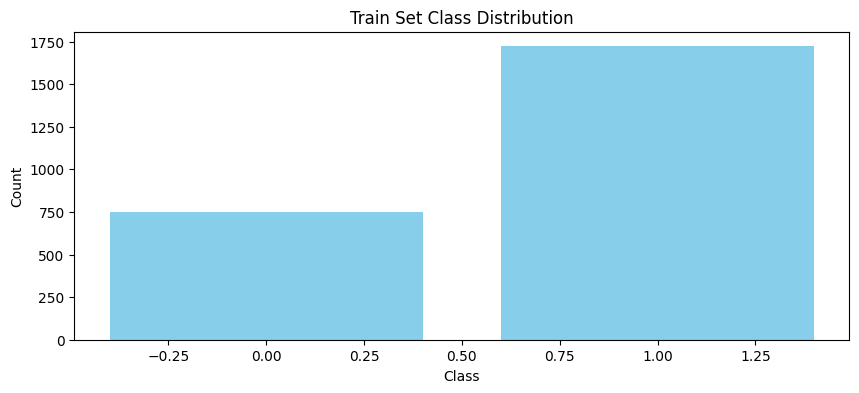

In [180]:
labels = np.unique(y_train_new)
plt.figure(figsize=(10,4))
plt.bar(labels, [np.sum(y_train_new==i) for i in labels], color='skyblue')
plt.title("Train Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

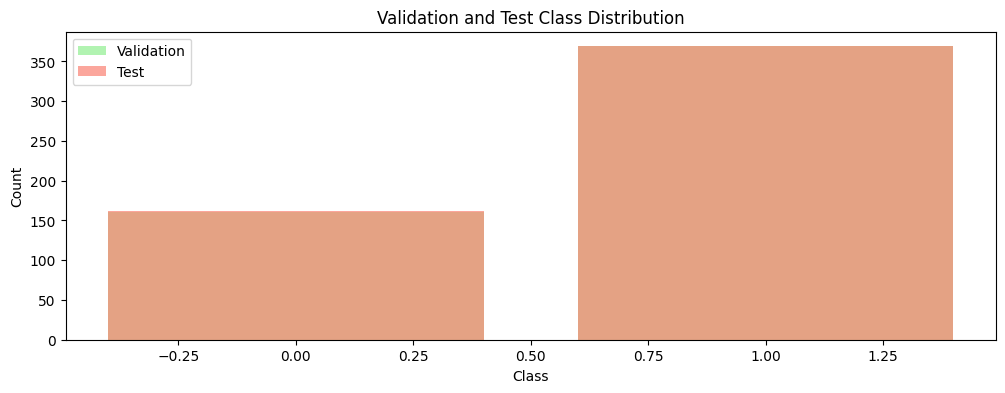

In [181]:
plt.figure(figsize=(12,4))
plt.bar(labels, [np.sum(y_val_new==i) for i in labels], color='lightgreen', alpha=0.7, label='Validation')
plt.bar(labels, [np.sum(y_test_new==i) for i in labels], color='salmon', alpha=0.7, label='Test')
plt.title("Validation and Test Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

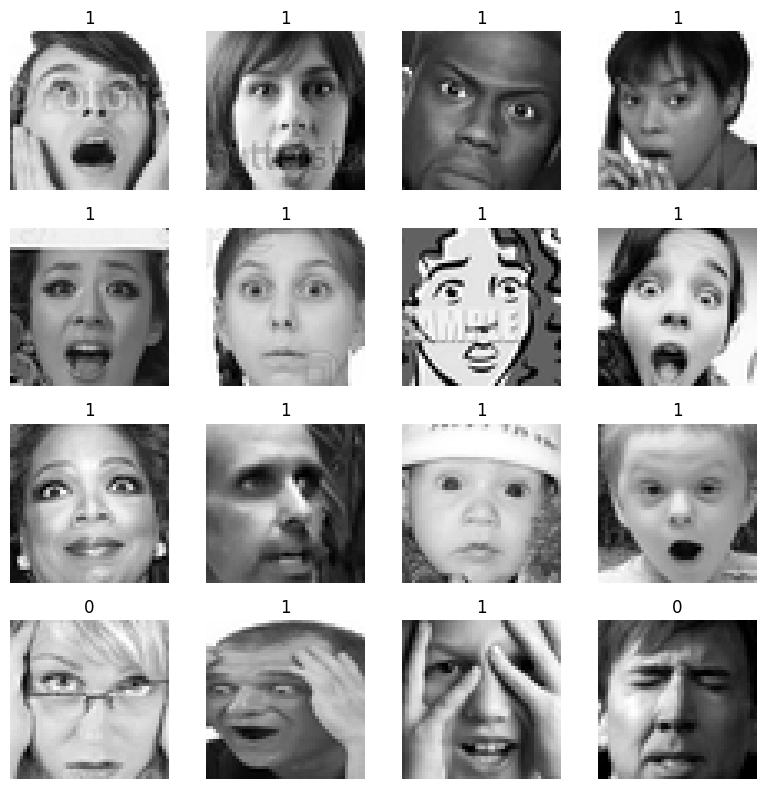

In [182]:
sample_idx = np.random.choice(len(X_train_new), 16, replace=False)
fig, axes = plt.subplots(4,4, figsize=(8,8))
for ax, idx in zip(axes.flatten(), sample_idx):
    ax.imshow(X_train_new[idx].squeeze(), cmap='gray')
    ax.set_title(y_train_new[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()


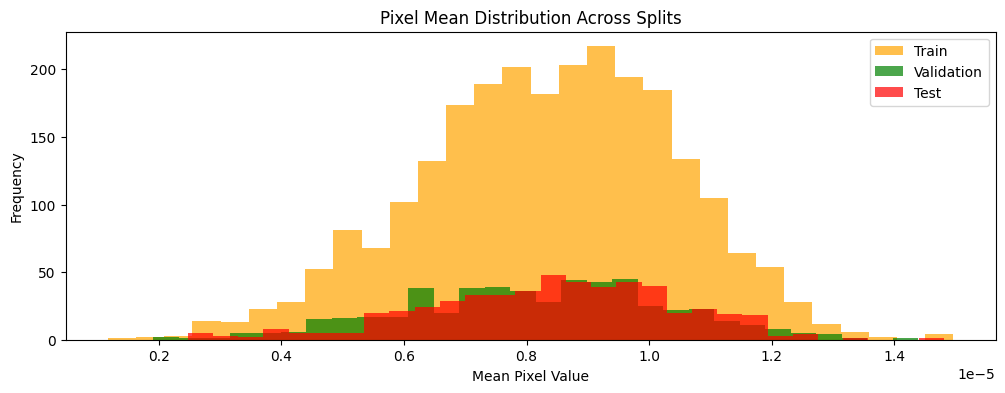

In [183]:
plt.figure(figsize=(12,4))
plt.hist(X_train_new.mean(axis=(1,2,3)), bins=30, alpha=0.7, label='Train', color='orange')
plt.hist(X_val_new.mean(axis=(1,2,3)), bins=30, alpha=0.7, label='Validation', color='green')
plt.hist(X_test_new.mean(axis=(1,2,3)), bins=30, alpha=0.7, label='Test', color='red')
plt.title("Pixel Mean Distribution Across Splits")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


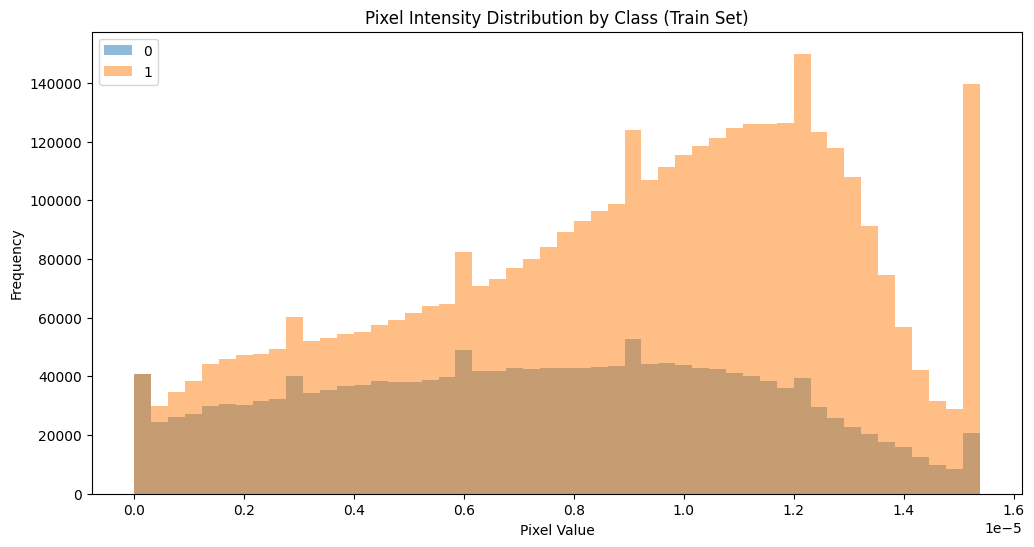

In [184]:
plt.figure(figsize=(12,6))
for cls in labels:
    pixels = X_train_new[y_train_new==cls].reshape(-1)
    plt.hist(pixels, bins=50, alpha=0.5, label=str(cls))
plt.title("Pixel Intensity Distribution by Class (Train Set)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [185]:
total_images = X_train_new.shape[0] + X_val_new.shape[0] + X_test_new.shape[0]
unique_labels_train = len(np.unique(y_train_new))
unique_labels_val = len(np.unique(y_val_new))
unique_labels_test = len(np.unique(y_test_new))
train_pixel_stats = {
    "mean_pixel": float(np.mean(X_train_new)),
    "min_pixel": float(np.min(X_train_new)),
    "max_pixel": float(np.max(X_train_new))
}
val_pixel_stats = {
    "mean_pixel": float(np.mean(X_val_new)),
    "min_pixel": float(np.min(X_val_new)),
    "max_pixel": float(np.max(X_val_new))
}
test_pixel_stats = {
    "mean_pixel": float(np.mean(X_test_new)),
    "min_pixel": float(np.min(X_test_new)),
    "max_pixel": float(np.max(X_test_new))
}

post_split_summary = {
    "total_images_across_splits": total_images,
    "unique_labels_train": unique_labels_train,
    "unique_labels_val": unique_labels_val,
    "unique_labels_test": unique_labels_test,
    "train_pixel_stats": train_pixel_stats,
    "val_pixel_stats": val_pixel_stats,
    "test_pixel_stats": test_pixel_stats
}

for key, value in post_split_summary.items():
    print(f"{key}: {value}")


total_images_across_splits: 3535
unique_labels_train: 2
unique_labels_val: 2
unique_labels_test: 2
train_pixel_stats: {'mean_pixel': 8.340302883880213e-06, 'min_pixel': 0.0, 'max_pixel': 1.5378702300949953e-05}
val_pixel_stats: {'mean_pixel': 8.188164429157041e-06, 'min_pixel': 0.0, 'max_pixel': 1.5378702300949953e-05}
test_pixel_stats: {'mean_pixel': 8.3979048213223e-06, 'min_pixel': 0.0, 'max_pixel': 1.5378702300949953e-05}
